# Laboratorio 2: Teleportación cuántica

Bienvenido a este laboratorio sobre teleportación cuántica en el que resolverás un problema que han tenido Alice y Bob. Relájate, ¡no es un problema de relación! Alice posee un qubit en un estado desconocido $\lvert \psi \rangle$ y desea transferir este estado cuántico a Bob. Sin embargo, están muy separados y carecen de medios para transferir información cuántica directamente, solo información clásica. ¿Es posible lograr su objetivo?

Resulta que si Alice y Bob comparten un par de qubits entrelazados, ella puede transferir su estado de qubit a Bob enviando dos bits de información clásica. Este proceso se conoce como teleportación porque, al final, Bob poseerá |ψ⟩ y Alice ya no lo tendrá.

## Antecedentes

La teleportación cuántica es un protocolo que permite la transferencia de información cuántica de un qubit a otro mediante entrelazamiento y comunicación clásica. Fue propuesto por Charles Bennett, Gilles Brassard, Claude Crépeau, Richard Jozsa, Asher Peres y William Wootters en 1993. El proceso no transmite el qubit en sí, sino que transfiere el estado cuántico del qubit de origen al qubit de destino.

El protocolo requiere tres qubits:

1. El qubit a teleportar (qubit de Alice)
2. La mitad de un par de qubits entrelazados (el segundo qubit de Alice)
3. La otra mitad del par entrelazado (qubit de Bob)

El protocolo se puede resumir en los siguientes pasos:

1. Crear un par entrelazado de qubits (par de Bell) compartido entre Alice y Bob.
2. Alice realiza una medición en la base de Bell en sus dos qubits.
3. Alice envía los resultados clásicos de su medición a Bob.
4. Bob aplica compuertas cuánticas apropiadas basadas en los resultados de medición de Alice para obtener el estado teletportado.

## Implementación

Para transferir un bit cuántico, Alice y Bob necesitan la ayuda de un tercero que les proporcione un par de qubits entrelazados. A continuación, Alice realiza ciertas operaciones en su qubit y comparte los resultados con Bob a través de un canal de comunicación clásico. Finalmente, Bob realiza una serie de operaciones por su parte para obtener con éxito el qubit de Alice. Ahora, profundicemos en cada uno de estos pasos.

Nuestro circuito cuántico constará de 3 qubits y 3 bits clásicos. Los qubits se nombrarán de la siguiente manera:
- $s$: El qubit "fuente" que contiene el estado $\lvert \psi \rangle$ que Alice desea transmitir a Bob.
- $a$: El qubit que inicialmente almacenará la mitad de Alice del par de Bell entrelazado.
- $b$: el qubit que inicialmente almacenará la mitad de Bob del par de Bell entrelazado.

El protocolo de teleportación en sí requiere 2 bits clásicos, e incluimos un tercero para medir el estado final de Bob. Los bits clásicos se denominarán de la siguiente manera:
- $c0$: El bit clásico que utiliza Alice para medir $a$.
- $c1$: El bit clásico que usa Alice para medir $s$.
- $c2$: El bit clásico que usa Bob para medir $b$.

### Ejercicio 1

Utiliza dos qubits para generar un estado de par de Bell entrelazado $\frac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt{2}}$. El qubit 𝑎 se asigna a Alice, mientras que el qubit 𝑏 se asigna a Bob.

*Hint*: Este estado se puede generar utilizando una compuerta Hadamard y una compuerta CNOT.

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit


def create_bell_pair(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    """Creates a bell pair between qubits a and b."""
    qc = QuantumCircuit(qr, cr)
    # unpack qubits
    # the first qubit is s but we won't be using it in this exercise
    _, a, b = qr

    ####### your code goes here #######
    
    qc.h(a)
    qc.cnot(a, b)

    return qc

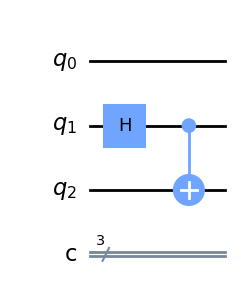

In [8]:
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")
qc = create_bell_pair(qr, cr)

qc.draw("mpl")

In [9]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2a

grade_ex2a(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Supongamos que Alice tiene el qubit $a$ y Bob tiene el qubit $b$ una vez que se separan. Tal vez realmente estén teniendo un problema de relación 😉.

### Ejercicio 2

Realiza los siguientes pasos del protocolo:
1. Alice aplica una compuerta CNOT con $s$ (el qubit que contiene $\lvert \psi \rangle$) como control y $a$ como objetivo.
2. Alice aplica una compuerta Hadamard a $s$.

In [10]:
def alice_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Creates Alices's gates"""
    qc = create_bell_pair(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr

    ####### your code goes here #######
    
    qc.cnot(s, a)
    qc.h(s)
    
    return qc

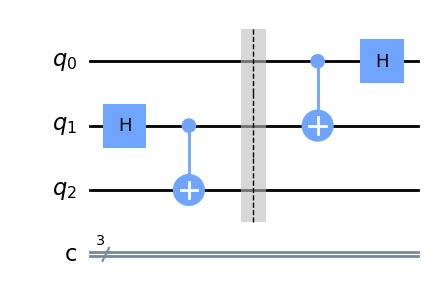

In [11]:
qc = alice_gates(qr, cr)
qc.draw("mpl")

In [12]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2b

grade_ex2b(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### Ejercicio 3

En este paso, Alice realiza una medición en ambos qubits que posee y guarda los resultados en dos bits clásicos. Luego, le envía estos dos bits a Bob.

Completa la siguiente celda de código para que Alice mida el qubit $a$ en el bit clásico $c0$ y el qubit $s$ en el bit clásico $c1$.

In [13]:
def measure_and_send(qr: QuantumRegister, cr: ClassicalRegister):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc = alice_gates(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######
    
    qc.measure(a, c0)
    qc.measure(s, c1)

    return qc

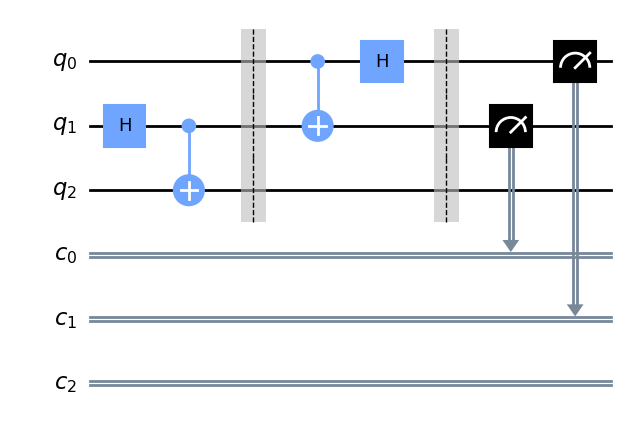

In [14]:
qc = measure_and_send(qr, cr)
qc.draw("mpl", cregbundle=False)

In [15]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2c

grade_ex2c(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### Ejercicio 4

En este paso, Bob, que ya posee el qubit $b$, agrega dinámicamente compuertas específicas al circuito en función del estado de los bits clásicos recibidos de Alice:

- Si los bits son `00`, no se requiere ninguna acción.
- Si son `01`, se debe aplicar una compuerta 𝑋 (también conocida como Pauli-X o compuerta bit-flip).
- Para los bits `10`, se debe aplicar una compuerta 𝑍 (también conocida como Pauli-Z o compuerta de cambio de fase).
- Por último, si los bits clásicos son `11`, se debe aplicar una compuerta combinada 𝑍𝑋, lo que implica aplicar las compuertas 𝑍 y 𝑋 en secuencia.

In [16]:
def bob_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Uses qc.if_test to control which gates are dynamically added"""
    qc = measure_and_send(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######
    
    with qc.if_test((c1, 1)):
        qc.z(b)
    with qc.if_test((c0, 1)):
        qc.x(b)
    

    return qc

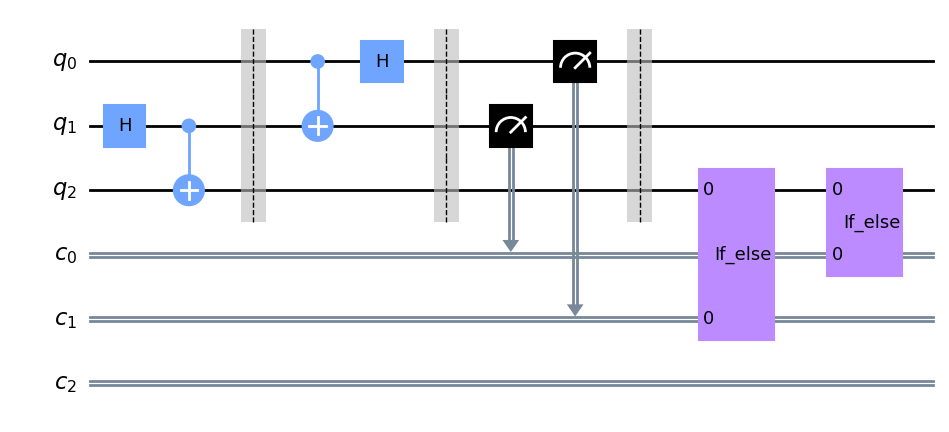

In [17]:
qc = bob_gates(qr, cr)
qc.draw("mpl", cregbundle=False)

In [18]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2d

grade_ex2d(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Ahora haremos que Bob mida su qubit en el bit clásico $c2$. Después de repetir todo el experimento varias veces, podemos recopilar estadísticas sobre los resultados de la medición para confirmar que la teleportación funcionó correctamente.

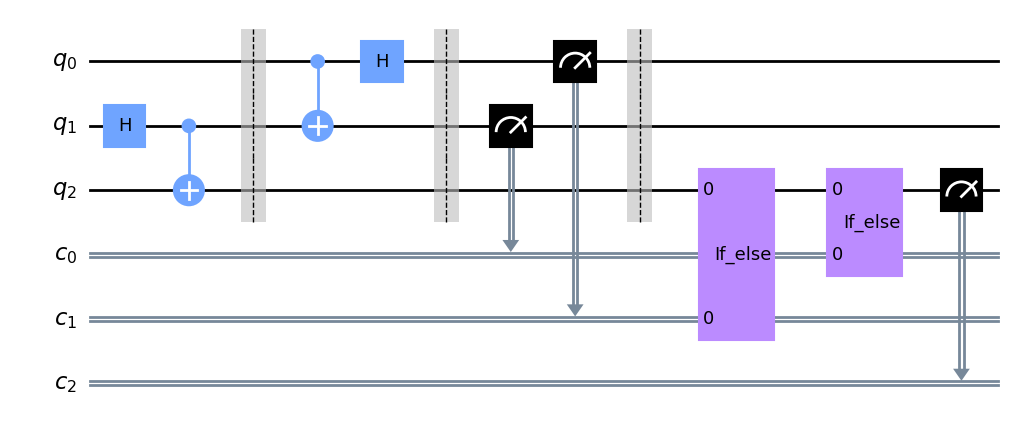

In [19]:
teleportation_circuit = bob_gates(qr, cr)
s, a, b = qr
c0, c1, c2 = cr
teleportation_circuit.measure(b, c2)
teleportation_circuit.draw("mpl")

Ahora que tenemos un circuito de teleportación, ~~transmitamos al Capitán Kirk a la superficie de un planeta extraño~~ crea y teleporta un estado cuántico, y luego ejecuta el circuito en un simulador.

### Ejercicio 5

En la siguiente celda de código, construye un circuito de teleportación cuántica completo en la variable `teleport_superposition_circuit`, siguiendo los siguientes pasos:

- Construye un circuito de preparación del estado. Prepara el qubit $s$ aplicando una rotación $R_x$ con ángulo $\pi / 4$.
- Combina el circuito de preparación de estado con tu circuito de teleportación construido previamente.

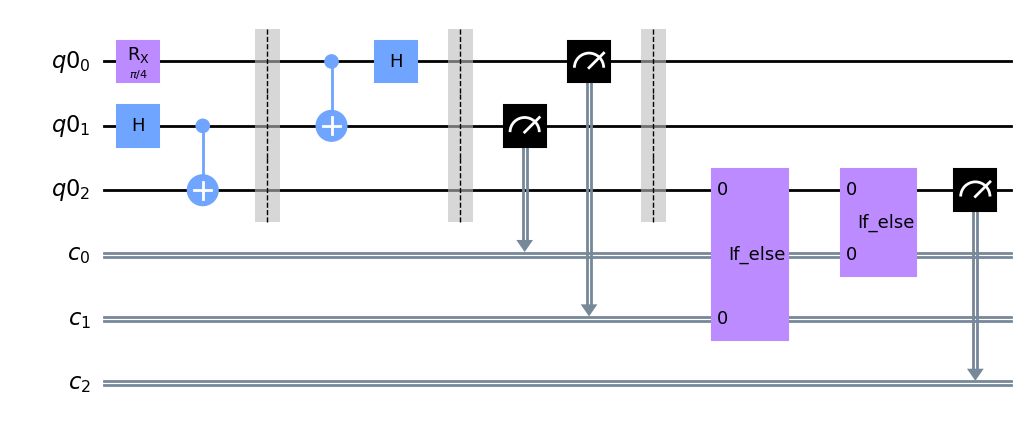

In [20]:
import math

teleport_superposition_circuit: QuantumCircuit

####### your code goes here #######

teleport_superposition_circuit = QuantumCircuit(qr,cr)
aux = QuantumRegister(3)
s, yy, zz = aux
test = QuantumCircuit(aux)
test.rx(math.pi/4, s)

# teleport_superposition_circuit.measure(b, c2)
teleport_superposition_circuit = test.compose(teleportation_circuit)




# Uncomment this line to draw your circuit
teleport_superposition_circuit.draw("mpl", cregbundle=False)

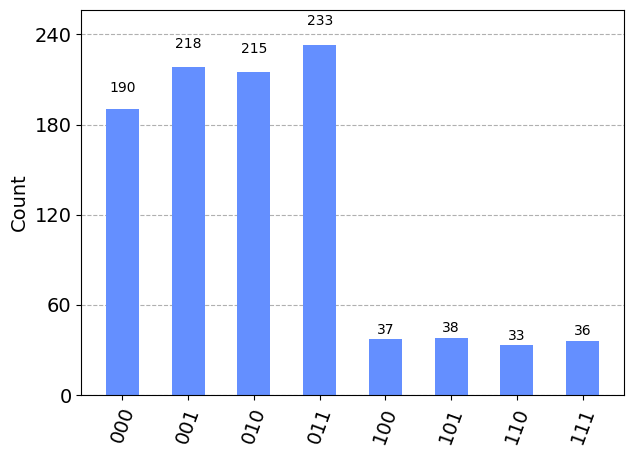

In [21]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()
transpiled_circuit = transpile(teleport_superposition_circuit, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots, dynamic=True)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

Calculemos la distribución solamente de la medición de Bob marginando sobre los otros bits medidos.

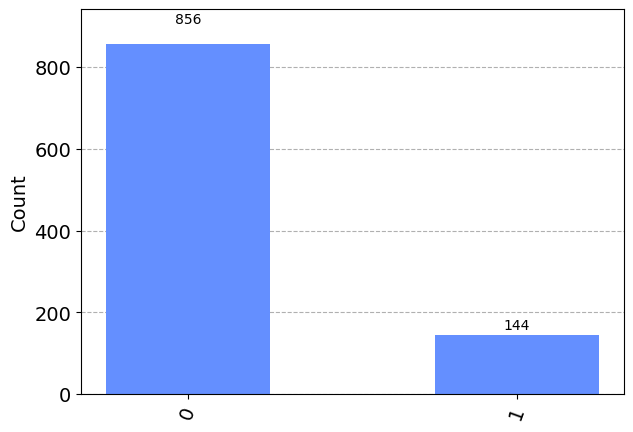

In [22]:
# trace out Bob's results on qubit 2
from qiskit.result import marginal_counts

bobs_counts = marginal_counts(exp_counts, [qr.index(b)])
plot_histogram(bobs_counts)

La distribución marginal debería estar algo cerca de las probabilidades ideales.

In [52]:
from qc_grader.challenges.spring_2023 import grade_ex2e

grade_ex2e(bobs_counts)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Ahora que estamos bastante seguros de que ~~el Capitán Kirk~~ el qubit de Alice se teleportará de manera segura, ejecutemos el circuito de teleportación cuántica en hardware real.

In [4]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

In [5]:
hub="qc-spring-23-2"
group="group-1"
project="recadoVo68Ok7S9J0"

backend_name = "ibm_peekskill"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

In [23]:
# backend.target.add_instruction(IfElseOp, name="if_else") # Uncomment if necessary
qc_transpiled = transpile(teleport_superposition_circuit, backend)

In [56]:
job = backend.run(qc_transpiled, shots=1000, dynamic=True)

Debido a que lleva tiempo ejecutarse en el backend real, normalmente usas job_id para llamar a los trabajos (jobs) después de un tiempo.
El siguiente código invoca trabajos a través de job_id y verifica el estado de ejecución. Aquí se explica cómo usarlo.

In [30]:
retrieve_job = provider.retrieve_job(job.job_id())
retrieve_job.status()

Traceback (most recent call last):
  Cell In[30], line 1
    retrieve_job = provider.retrieve_job(job.job_id())
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_provider.py:631 in retrieve_job
    return self._backend.retrieve_job(job_id=job_id)
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_backend_service.py:651 in retrieve_job
    raise IBMBackendApiError(
IBMBackendApiError: 'Failed to get job 1ec23f5f-ac65-47e0-b6ed-a68343436c91: \'404 Client Error: Not Found for url: https://runtime-us-east.quantum-computing.ibm.com/facade/v1/jobs/1ec23f5f-ac65-47e0-b6ed-a68343436c91/type. {"errors":[{"code":"not_found","message":"job not found","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"chk70b3r1tmvfc2vlep0"}\''

Use %tb to get the full traceback.


Si tu trabajo terminó con éxito, entonces importemos los resultados.

In [32]:
# Get the results and display them
exp_result = retrieve_job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

Traceback (most recent call last):
  Cell In[32], line 2
    exp_result = retrieve_job.result()
NameError: name 'retrieve_job' is not defined

Use %tb to get the full traceback.


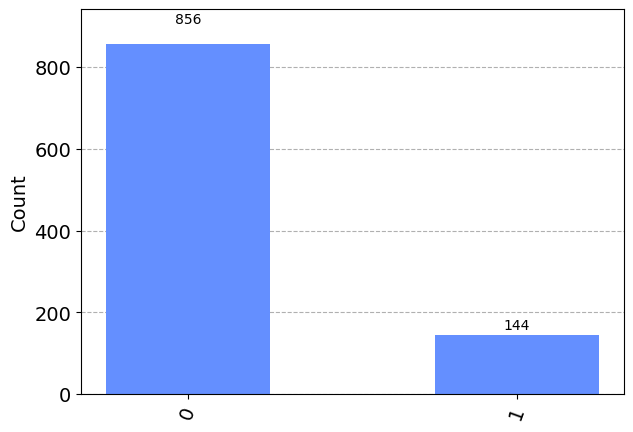

In [33]:
# trace out Bob's results on qubit 2
from qiskit.result import marginal_counts

bobs_qubit = 2
bobs_counts = marginal_counts(exp_counts, [bobs_qubit])
plot_histogram(bobs_counts)